<h1> Regression Model  </h1>
- พยากรณ์ผลลัพธ์ที่จะเกิดขึ้นในอนาคต
- หาค่า Y จากค่า X ( X อาจจะมีมากกว่า 1 มิติ X1, X2, ..., Xn)

<h3> more info: </h3>
-  Linear Regression
    http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    
- Support Vector Regression (SVR) 
    http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
    
- Model evaluation
    http://scikit-learn.org/stable/modules/model_evaluation.html



In [3]:
%matplotlib  inline

from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Training Time: 0.003012
Prediction Time: 0.001000
0.0803974773563


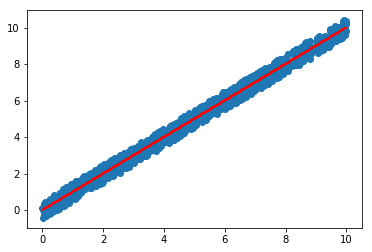

coefficient R^2:  0.990320040858
MSE:  0.0803974773563


C:\Users\taratep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time: 3.984027
Prediction Time: 0.037758
coefficient R^2:  0.990321504313
MSE:  0.0803853225414


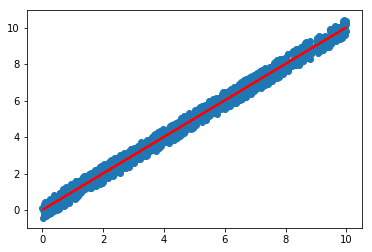

In [9]:
seed = 1
np.random.seed(seed)
noise = 0.5
ndataset = 10000
ratio_test = 0.1

# 1D Data
# prepare dataset  Training set and Test set
mys = lambda x: np.random.uniform(-noise, noise, 1)+x

X = np.sort(np.random.uniform(0, 10, (ndataset,1)), axis=0)
Y = np.apply_along_axis(mys, 1, X)
# print(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ratio_test, random_state=seed)
# print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# ============================ Linear Regression ===================
st = time()
model_regr = LinearRegression().fit(X_train, Y_train)
print('Training Time: %.6f'%(time()-st))
st = time()
Y_pred_line = model_regr.predict(X_test)
print('Prediction Time: %.6f'%(time()-st))
MSE_line = mean_squared_error(Y_test, Y_pred_line)
print(MSE_line)

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred_line, 'r')
plt.show()
print( 'coefficient R^2: ', model_regr.score(X_test, Y_test) )
print( 'MSE: ', MSE_line )
print('='*50)
# # ============================= SVR =============================

st = time()
model_svr = SVR('linear').fit(X_train, Y_train)
print('Training Time: %.6f'%(time()-st))
st = time()
Y_pred_svr = model_svr.predict(X_test)
print('Prediction Time: %.6f'%(time()-st))

MSE_svr = mean_squared_error(Y_test, Y_pred_svr)
print( 'coefficient R^2: ', model_svr.score(X_test, Y_test) )
print( 'MSE: ', MSE_svr )
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred_svr, 'r')
plt.show()

Training Time: 0.001000
Prediction Time: 0.000498


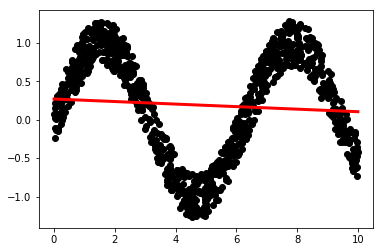

coefficient R^2:  0.00983354846738
MSE:  0.48398791366
Training Time: 2.875344
Prediction Time: 0.179001


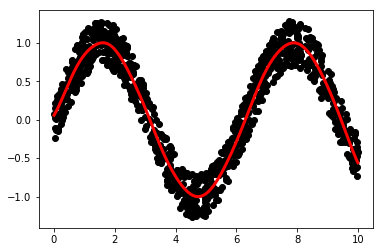

coefficient R^2:  0.940265276474
MSE:  0.0291980042017


In [11]:
seed = 1
np.random.seed(seed)
noise = 0.3
ndataset = 10000
ratio_test = 0.1


X = np.sort(np.random.uniform(0, 10, (ndataset,1)), axis=0)
Y = np.sin(X) + np.random.uniform(-noise, noise, (ndataset,1))
# Y = ((X*X)*np.log(X)+X) + np.random.uniform(-noise, noise, (ndataset,1))


# Sort dataset from X value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ratio_test, random_state=seed)
train_df = pd.DataFrame({'X':X_train[:, 0], 'Y':Y_train[:, 0]}).sort_values(by ='X')
test_df = pd.DataFrame({'X':X_test[:, 0], 'Y':Y_test[:, 0]}).sort_values(by ='X')

X_train = train_df.X.as_matrix().reshape(train_df.shape[0], 1)
Y_train = train_df.Y.as_matrix()
X_test = test_df.X.as_matrix().reshape(test_df.shape[0], 1)
Y_test = test_df.Y.as_matrix()

# print(test_df)
# ============================ Linear Regression ===================
st = time()
model_regr = LinearRegression().fit(X_train, Y_train)
print('Training Time: %.6f'%(time()-st))
st = time()
Y_pred_line = model_regr.predict(X_test)
print('Prediction Time: %.6f'%(time()-st))
MSE_line = mean_squared_error(Y_test, Y_pred_line)
plt.scatter(X_test, Y_test, color='k')
plt.plot(X_test, Y_pred_line, 'r', lw=3)
plt.show()
print( 'coefficient R^2: ', model_regr.score(X_test, Y_test) )
print( 'MSE: ', MSE_line )
print('='*50)

# ============================= SVR =============================

st = time()
model_svr = SVR('rbf').fit(X_train, Y_train)
print('Training Time: %.6f'%(time()-st))
st = time()
Y_pred_svr = model_svr.predict(X_test)
print('Prediction Time: %.6f'%(time()-st))
MSE_svr = mean_squared_error(Y_test, Y_pred_svr)
plt.scatter(X_test, Y_test, color='k')
plt.plot(X_test, Y_pred_svr, 'r', lw=3)
plt.show()
print( 'coefficient R^2: ', model_svr.score(X_test, Y_test) )
print( 'MSE: ', MSE_svr )

# Guess
# Y_pred_guess = (X_test[:,0]* X_test[:,0])*np.log( X_test[:,0])+ X_test[:,0]
# MSE_gus = mean_squared_error(Y_test, Y_pred_guess)
# plt.scatter(X_test, Y_test, color='k')
# plt.plot(X_test, Y_pred_guess, 'r', lw=3)
# plt.show()
